# Exercises Evaluation Metrics

In [36]:
import pandas as pd                                                     # Data manipulation
from sklearn.metrics import roc_auc_score                               # ROC AUC score

from Resources.Functions import *                                       # Custom functions

## Theoretical questions

### Question 1:
- In the table below you will find the confusion matrix of a binary classifier.

|            | Predicted YES | Predicted NO | Total |
|------------|---------------|--------------|-------|
| Actual YES | 100           | 5            | 105   |
| Actual NO  | 10            | 50           | 60    |
| Total      | 110           | 55           | 165   |

- Now answer the following questions:
     - What are the values for TP, TN, FP, FN?
     - Now calculate the accuracy, precision and recall.
     - Calculate the F1 and F1.5 measures.
     - What is the TPR and FPR? Compare with your recall. What do you determine?

In [37]:
# YES = Positive
# NO = Negative
confusion_matrix1 = pd.DataFrame(data=[[100, 5], [10, 50]], columns=['Predicted YES', 'Predicted NO'], index=['Actual YES', 'Actual NO'])
display(confusion_matrix1)

,Predicted YES,Predicted NO
Actual YES,100,5
Actual NO,10,50


In [38]:
# 1
trueFalsef(confusion_matrix1, columnnb=0)

TP 100
TN: 50
FP: 10
FN: 5


In [39]:
# 2
accuracy = accuracyf(confusion_matrix1)
print(f"Acuracy: {round(accuracy, 3)}\n")

precision_yes = precisionf(confusion_matrix1)[0]
print(f"Precision YES: {round(precision_yes, 3)}")
precision_no = precisionf(confusion_matrix1)[1]
print(f"Precision NO: {round(precision_no, 3)}\n")

recall_yes = recallf(confusion_matrix1)[0]
print(f"Recall YES: {round(recall_yes, 3)}")
recall_no = recallf(confusion_matrix1)[1]
print(f"Recall NO: {round(recall_no, 3)}")

Acuracy: 0.909

Precision YES: 0.909
Precision NO: 0.909

Recall YES: 0.952
Recall NO: 0.833


In [40]:
# 3
f1 = f_measuref(confusion_matrix1, 1)[0] # Beta = 1
print(f"F1 YES: {round(f1, 3)}")
f1 = f_measuref(confusion_matrix1, 1)[1] # Beta = 1
print(f"F1 NO: {round(f1, 3)}")

F1 YES: 0.93
F1 NO: 0.87


In [41]:
# 4
# TPR = Recall = TP / (TP + FN)
# FPR = FP / (FP + TN)
positiveratesf(confusion_matrix1)

print("\n(EN) -> The difference between recall and TPR is that recall is the ratio of the correctly predicted positive observations to the all observations in actual class and TPR is the ratio of the correctly predicted positive observations to the all observations in predicted class.")
print("\n(NL) -> Het verschil tussen recall en TPR is dat recall de verhouding is van de correct voorspelde positieve observaties tot alle observaties in de werkelijke klasse en TPR is de verhouding van de correct voorspelde positieve observaties tot alle observaties in de voorspelde klasse.")

TPR 0.9523809523809523
FPR 0.16666666666666666

(EN) -> The difference between recall and TPR is that recall is the ratio of the correctly predicted positive observations to the all observations in actual class and TPR is the ratio of the correctly predicted positive observations to the all observations in predicted class.

(NL) -> Het verschil tussen recall en TPR is dat recall de verhouding is van de correct voorspelde positieve observaties tot alle observaties in de werkelijke klasse en TPR is de verhouding van de correct voorspelde positieve observaties tot alle observaties in de voorspelde klasse.


### Question 2:
- In the table below you will find the confusion matrix of a binary classifier.

|            | Predicted YES | Predicted NO | Total |
|------------|---------------|--------------|-------|
| Actual A   | 100           | 0            | 100   |
| Actual B   | 50            | 5            | 55    |
| Total      | 150           | 5            | 155   |

- Now answer the following questions:
     - What are the values for TP, TN, FP, FN?
     - Calculate the accuracy, precision and recall, and F1 with your own Python functions.
     - Is this a good classifier?


In [42]:
# YES = Positive
# NO = Negative
confusion_matrix2 = pd.DataFrame(data=[[100, 0], [50, 5]], columns=['Predicted YES', 'Predicted NO'], index=['Actual A', 'Actual B'])

display(confusion_matrix2)

,Predicted YES,Predicted NO
Actual A,100,0
Actual B,50,5


In [43]:
# 1
trueFalsef(confusion_matrix2, columnnb=0)

TP 100
TN: 5
FP: 50
FN: 0


In [44]:
# 2
accuracy = accuracyf(confusion_matrix2)
print(f"Acuracy: {round(accuracy, 3)}\n")

precision_yes = precisionf(confusion_matrix2)[0]
print(f"Precision YES: {round(precision_yes, 3)}")
precision_no = precisionf(confusion_matrix2)[1]
print(f"Precision NO: {round(precision_no, 3)}\n")

recall_a = recallf(confusion_matrix2)[0]
print(f"Recall A: {round(recall_a, 3)}")
recall_b = recallf(confusion_matrix2)[1]
print(f"Recall B: {round(recall_b, 3)}\n")

f1 = f_measuref(confusion_matrix2, 1)[0] # Beta = 1
print(f"F1 YES: {round(f1, 3)}")
f1 = f_measuref(confusion_matrix2, 1)[1] # Beta = 1
print(f"F1 NO: {round(f1, 3)}")

Acuracy: 0.677

Precision YES: 0.667
Precision NO: 1.0

Recall A: 1.0
Recall B: 0.091

F1 YES: 0.8
F1 NO: 0.167


In [45]:
# 3
evaluate_classifier(confusion_matrix2, beta=1, threshold=0.9)

This is a bad classifier with a threshold of 0.9


### Question 3:
- In the table below you will find the confusion matrix of a multiclass classifier.

|            | Asfalt | Beton | Gras | Boom | Gebouw | Total |
|------------|--------|-------|------|------|--------|-------|
| Asfalt     | 2385   | 0     | 0    | 0    | 12     | 2397  |
| Beton      | 4      | 332   | 1    | 0    | 0      | 337   |
| Gras       | 0      | 0     | 908  | 0    | 0      | 908   |
| Boom       | 1      | 0     | 8    | 1084 | 6      | 1099  |
| Gebouw     | 4      | 1     | 0    | 9    | 2053   | 2067  |
| Total      | 2394   | 333   | 917  | 1093 | 2071   | 6808  |

- Beantwoord nu de volgende vragen:
    - What are the values for TP, FP, FN for the Grass class?
    - Now calculate the accuracy, precision and recall per class with these functions.
    - Is this a good classifier?


In [46]:
confusion_matrix3 = pd.DataFrame(data=[[2385, 0, 0, 0, 12], [4, 332, 1, 0, 0], [0, 0, 908, 0, 0], [1, 0, 8, 1084, 6], [4, 1, 0, 9, 2053]], columns=['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw'], index=['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw'])

display(confusion_matrix3)

,Asfalt,Beton,Gras,Boom,Gebouw
Asfalt,2385,0,0,0,12
Beton,4,332,1,0,0
Gras,0,0,908,0,0
Boom,1,0,8,1084,6
Gebouw,4,1,0,9,2053


In [47]:
# 1
trueFalsef(confusion_matrix3, columnnb=2)

TP 908
TN: 5854
FP: 9
FN: 0


In [48]:
# 2
accuracy = accuracyf(confusion_matrix3)
print(f"Acuracy: {round(accuracy, 3)}\n")

precision_asfalt = precisionf(confusion_matrix3)[0]
print(f"Precision Asfalt: {round(precision_asfalt, 3)}")
precision_beton = precisionf(confusion_matrix3)[1]
print(f"Precision Beton: {round(precision_beton, 3)}")
precision_gras = precisionf(confusion_matrix3)[2]
print(f"Precision Gras: {round(precision_gras, 3)}")
precision_boom = precisionf(confusion_matrix3)[3]
print(f"Precision Boom: {round(precision_boom, 3)}")
precision_gebouw = precisionf(confusion_matrix3)[4]
print(f"Precision Gebouw: {round(precision_gebouw, 3)}\n")

recall_asfalt = recallf(confusion_matrix3)[0]
print(f"Recall Asfalt: {round(recall_asfalt, 3)}")
recall_beton = recallf(confusion_matrix3)[1]
print(f"Recall Beton: {round(recall_beton, 3)}")
recall_gras = recallf(confusion_matrix3)[2]
print(f"Recall Gras: {round(recall_gras, 3)}")
recall_boom = recallf(confusion_matrix3)[3]
print(f"Recall Boom: {round(recall_boom, 3)}")
recall_gebouw = recallf(confusion_matrix3)[4]
print(f"Recall Gebouw: {round(recall_gebouw, 3)}\n")

f1 = f_measuref(confusion_matrix3, 1)[0] # Beta = 1
print(f"F1 Asfalt: {round(f1, 3)}")
f1 = f_measuref(confusion_matrix3, 1)[1] # Beta = 1
print(f"F1 Beton: {round(f1, 3)}")
f1 = f_measuref(confusion_matrix3, 1)[2] # Beta = 1
print(f"F1 Gras: {round(f1, 3)}")
f1 = f_measuref(confusion_matrix3, 1)[3] # Beta = 1
print(f"F1 Boom: {round(f1, 3)}")
f1 = f_measuref(confusion_matrix3, 1)[4] # Beta = 1
print(f"F1 Gebouw: {round(f1, 3)}")

Acuracy: 0.993

Precision Asfalt: 0.996
Precision Beton: 0.997
Precision Gras: 0.99
Precision Boom: 0.992
Precision Gebouw: 0.991

Recall Asfalt: 0.995
Recall Beton: 0.985
Recall Gras: 1.0
Recall Boom: 0.986
Recall Gebouw: 0.993

F1 Asfalt: 0.996
F1 Beton: 0.991
F1 Gras: 0.995
F1 Boom: 0.989
F1 Gebouw: 0.992


In [49]:
# 3
evaluate_classifier(confusion_matrix3, beta=1, threshold=0.9)

This is a good classifier with a threshold of 0.9


### Question 4:
- Read the data in the file `simpsons_roc1` & `simpsons_roc2`. Do you notice any differences?
     - Use the `plot_roc` function to draw the ROC curve.
     - What is the best threshold value?
     - What is the AUC? What does it mean?
    - Apply the found threshold value to the `y_score` column (this column contains the results of a neural network predict_proba function) to create a new predicted column.


In [50]:
simpsons_roc1 = pd.read_csv('../Data/Simpsons_roc1.csv', delimiter=',', decimal='.')
display(simpsons_roc1)

simpsons_roc2 = pd.read_csv('../Data/Simpsons_roc2.csv', delimiter=',', decimal='.')
display(simpsons_roc2)

,y_true,y_score
0,0,0.001611
1,1,0.568856
2,0,0.224951
3,1,0.678186
4,1,0.780744
5,0,0.030405
6,1,0.431997
7,0,0.346567
8,0,0.102228


,y_true,y_score
0,0,2.877834e-10
1,1,7.970729e-01
2,0,2.533495e-03
3,1,9.756606e-01
4,1,9.971678e-01
5,0,2.030402e-02
6,1,5.763744e-01
7,0,1.594006e-01
8,0,1.794845e-03


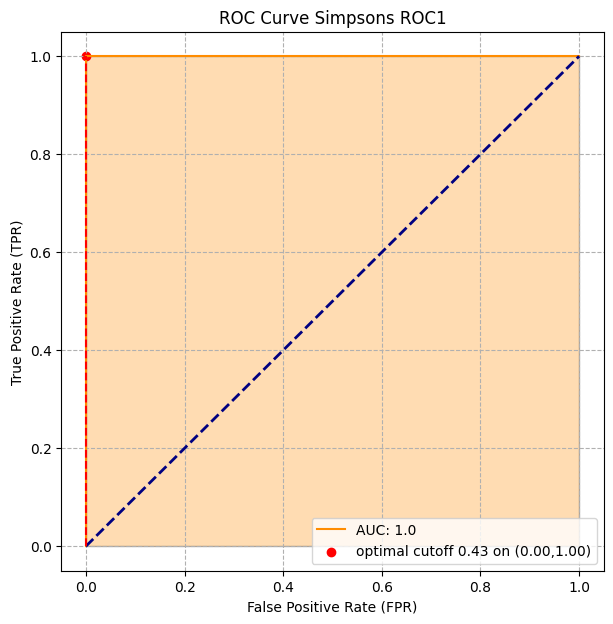

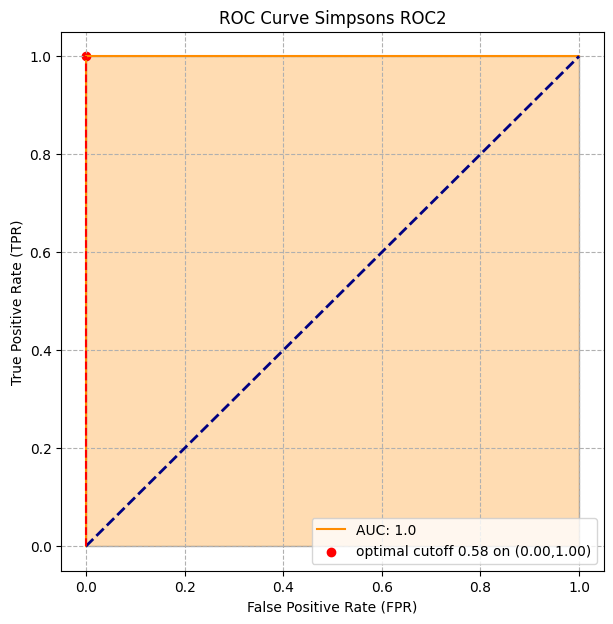

In [51]:
# 1 Simpsons_roc1
plot_rocf(y_true=simpsons_roc1['y_true'], y_score=simpsons_roc1['y_score'], title='ROC Curve Simpsons ROC1')

# 1 Simpsons_roc2
plot_rocf(y_true=simpsons_roc2['y_true'], y_score=simpsons_roc2['y_score'], title='ROC Curve Simpsons ROC2')

In [52]:
# 2 Simpsons_roc1
best_threshold1 = find_best_threshold(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
print("Beste drempelwaarde voor simpsons_roc1:", best_threshold1)

# 2 Simpsons_roc2
best_threshold2 = find_best_threshold(simpsons_roc2['y_true'], simpsons_roc2['y_score'])
print("Beste drempelwaarde voor simpsons_roc2:", best_threshold2)

Beste drempelwaarde voor simpsons_roc1: 0.4319972097873688
Beste drempelwaarde voor simpsons_roc2: 0.576374351978302


In [53]:
# 3 Simpsons_roc1
auc_score1 = roc_auc_score(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
print("AUC voor simpsons_roc1:", auc_score1)

# 3 Simpsons_roc2
auc_score2 = roc_auc_score(simpsons_roc2['y_true'], simpsons_roc2['y_score'])
print("AUC voor simpsons_roc2:", auc_score2)

AUC voor simpsons_roc1: 1.0
AUC voor simpsons_roc2: 1.0


In [54]:
# 4 Simpsons_roc1
simpsons_roc1['y_pred'] = simpsons_roc1['y_score'].apply(lambda x: 1 if x > best_threshold1 else 0)
display(simpsons_roc1)

# 4 Simpsons_roc2
simpsons_roc2['y_pred'] = simpsons_roc2['y_score'].apply(lambda x: 1 if x > best_threshold2 else 0)
display(simpsons_roc2)

,y_true,y_score,y_pred
0,0,0.001611,0
1,1,0.568856,1
2,0,0.224951,0
3,1,0.678186,1
4,1,0.780744,1
5,0,0.030405,0
6,1,0.431997,0
7,0,0.346567,0
8,0,0.102228,0


,y_true,y_score,y_pred
0,0,2.877834e-10,0
1,1,7.970729e-01,1
2,0,2.533495e-03,0
3,1,9.756606e-01,1
4,1,9.971678e-01,1
5,0,2.030402e-02,0
6,1,5.763744e-01,0
7,0,1.594006e-01,0
8,0,1.794845e-03,0


### Question 5:
- Two linear discriminant analysis models were built with the dataset infert. The results of the predictions can be found in the files `Education_roc1.csv` and `Education_roc2.csv`.
    - Load both datasets.
    - Use the `plot_roc` function to plot both ROC curves. For both data sets, use column `6-11yrs` as the `y-score` and transform the column `y_true` into 1 for the values `6-11yrs` and a 0 for the other values.
    - What is the best threshold value for each of the ROC curves?
    - Which model do you prefer?

In [55]:
# 1 Education_roc1
education_roc1 = pd.read_csv('../Data/Education_roc1.csv', delimiter=',', decimal='.')
display(education_roc1.head())

# 1 Education_roc2
education_roc2 = pd.read_csv('../Data/Education_roc2.csv', delimiter=',', decimal='.')
display(education_roc2.head())

,12+ yrs,6-11yrs,y_true
0,0.337185,0.662815,6-11yrs
1,0.275267,0.724733,6-11yrs
2,0.766077,0.233923,6-11yrs
3,0.468015,0.531985,6-11yrs
4,0.808740,0.191260,6-11yrs


,12+ yrs,6-11yrs,y_true
0,0.0,1.0,6-11yrs
1,0.0,1.0,6-11yrs
2,0.0,1.0,6-11yrs
3,0.0,1.0,6-11yrs
4,0.0,1.0,6-11yrs


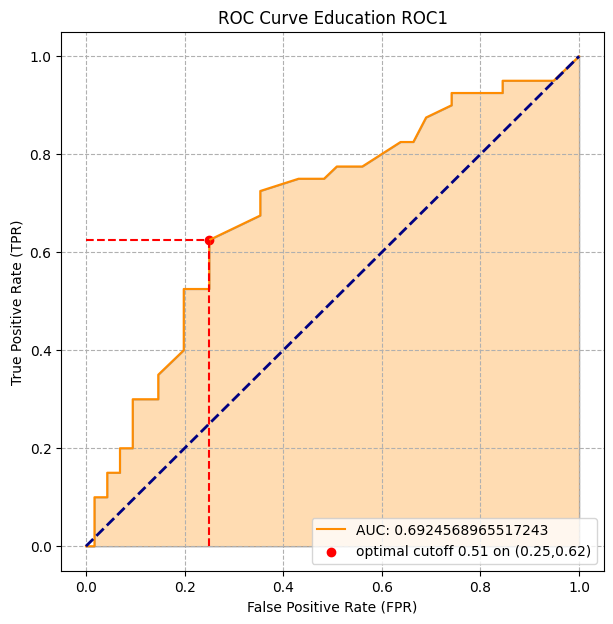

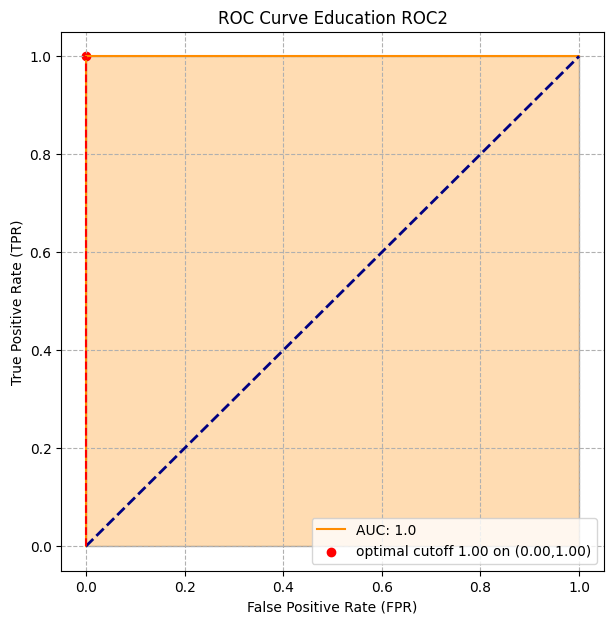

In [56]:
# 2 Education_roc1
y_true1 = education_roc1['y_true'].apply(lambda x: 1 if x == "6-11yrs" else 0)
y_score1 = education_roc1['6-11yrs']
plot_rocf(y_true=y_true1, y_score=y_score1, title='ROC Curve Education ROC1')

# 2 Education_roc2
y_true2 = education_roc2['y_true'].apply(lambda x: 1 if x == "6-11yrs" else 0)
y_score2 = education_roc2['6-11yrs']
plot_rocf(y_true=y_true2, y_score=y_score2, title='ROC Curve Education ROC2')

In [57]:
# 3 Education_roc1
best_threshold1 = find_best_threshold(y_true1, y_score1)
print("Beste drempelwaarde voor Education_roc1:", best_threshold1)

# 3 Education_roc2
best_threshold2 = find_best_threshold(y_true2, y_score2)
print("Beste drempelwaarde voor Education_roc2:", best_threshold2)

Beste drempelwaarde voor Education_roc1: 0.4773177037798583
Beste drempelwaarde voor Education_roc2: 1.0


In [58]:
print("The AUC for Education_roc2 1.0 is higher than the AUC for Education_roc1 0.69~. Therefore, I prefer the model of Education_roc2.")

The AUC for Education_roc2 1.0 is higher than the AUC for Education_roc1 0.69~. Therefore, I prefer the model of Education_roc2.
